# Exploratory Data Analysis of US Traffic Accidents in 2016-2021

## Preparing the Data

Import all necessary libraries

In [190]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

Read the file

In [191]:
df_accidents = pd.read_csv('US_Accidents_Dec21_updated.csv')

Look to the datatypes of each column

In [192]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

We see that the columns related with time have datatype object (string)

Let's change their format to datetime

In [193]:
df_accidents.Start_Time= pd.to_datetime(df_accidents.Start_Time)
df_accidents.End_Time= pd.to_datetime(df_accidents.End_Time)

Number of unique values in every column

In [194]:
df_accidents.nunique()

ID                       2845342
Severity                       4
Start_Time               1807311
End_Time                 2239983
Start_Lat                1093618
Start_Lng                1120365
End_Lat                  1080811
End_Lng                  1105404
Distance(mi)               14165
Description              1174563
Number                     46402
Street                    159651
Side                           3
City                       11681
County                      1707
State                         49
Zipcode                   363085
Country                        1
Timezone                       4
Airport_Code                2004
Weather_Timestamp         474214
Temperature(F)               788
Wind_Chill(F)                897
Humidity(%)                  100
Pressure(in)                1068
Visibility(mi)                76
Wind_Direction                24
Wind_Speed(mph)              136
Precipitation(in)            230
Weather_Condition            127
Amenity   

Look how the first 3 rows are look like

In [195]:
pd.options.display.max_columns = None
df_accidents.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day


Let's create separate columns for different frames of date

In [196]:
df_accidents['Year'] = df_accidents['Start_Time'].dt.year
df_accidents['Month'] = df_accidents['Start_Time'].dt.month
df_accidents['MonthName'] = df_accidents['Start_Time'].dt.month_name().str[:3]
df_accidents['Year_Month'] = df_accidents['Start_Time'].dt.to_period('M')
df_accidents['Weekday'] = df_accidents['Start_Time'].dt.day
df_accidents['WeekdayName'] = df_accidents['Start_Time'].dt.day_name().str[:3]
df_accidents['Hour'] = df_accidents['Start_Time'].dt.hour

#We will use this lists for ordering in barcharts
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

Let's look if we have missing data in some months

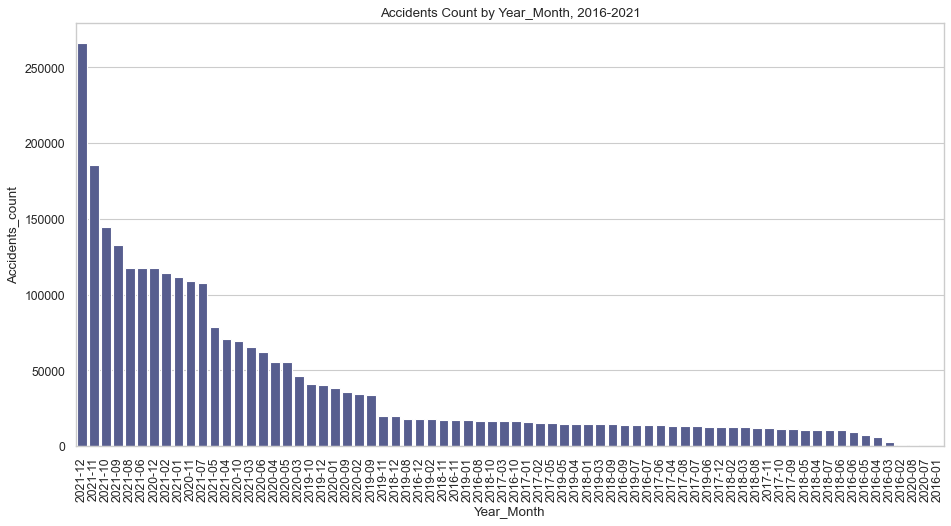

In [197]:
df_YearMonth_accidents = df_accidents['Year_Month'].value_counts().to_frame().reset_index().set_axis(['Year_Month', 'Accidents_count'], axis=1)

fig, ax = plt.subplots(figsize = (14,7), dpi = 80)
plt.xticks(rotation=90)

ax=sns.barplot(x='Year_Month', y='Accidents_count', data = df_YearMonth_accidents, color='#4e5798').set(title='Accidents Count by Year_Month, 2016-2021')

As we can see in the barchart, there is no data for 2016-01, 2016-02, 2020-07, 2020-08

Also there is a few data for the 2016 H1

Below we count top 5 most frequent data for every column

In [198]:
from IPython.core.display import HTML
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")
multi_table([pd.DataFrame(df_accidents[col].value_counts().head(5)) for col in df_accidents.columns])

,ID
A-1,1
A-1896898,1
A-1896890,1
A-1896891,1
A-1896892,1
,Severity
2,2532991
3,155105
4,131193
1,26053


Let's create separate dataframes for every year, so we could operate specific year without appealing to the whole dataframe

In [199]:
accidents_2016 = df_accidents[df_accidents.Start_Time.dt.year == 2016]
accidents_2017 = df_accidents[df_accidents.Start_Time.dt.year == 2017]
accidents_2018 = df_accidents[df_accidents.Start_Time.dt.year == 2018]
accidents_2019 = df_accidents[df_accidents.Start_Time.dt.year == 2019]
accidents_2020 = df_accidents[df_accidents.Start_Time.dt.year == 2020]
accidents_2021 = df_accidents[df_accidents.Start_Time.dt.year == 2021]

# Geographical Analysis

### Cities

Create table of cities and number of accidents occured

In [200]:
df_cities = df_accidents[['City', 'State']].value_counts().to_frame().reset_index().set_axis(['City', 'State','Accidents_count'], axis=1)

df_cities.head(3)

,City,State,Accidents_count
0,Miami,FL,106896
1,Los Angeles,CA,68956
2,Orlando,FL,54654


Get 15 cities with the highest number of accidents in 2016-2021 and create a barchart

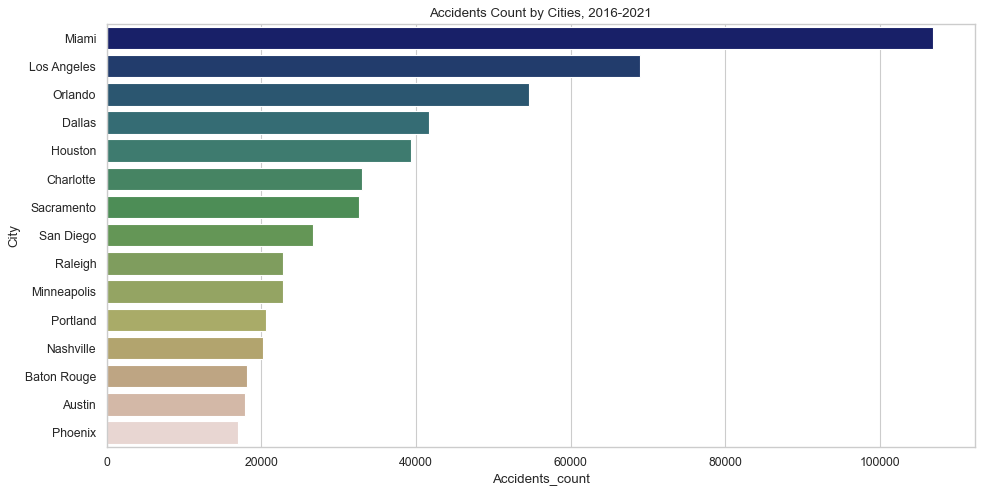

In [201]:
top_15_cities = df_cities.head(15)

fig, ax = plt.subplots(figsize = (14,7), dpi = 80)
ax.set(ylabel=None)

ax=sns.barplot(y='City', x='Accidents_count', data = top_15_cities, palette='gist_earth').set(title='Accidents Count by Cities, 2016-2021')

Now we want to understand the ratio of accidents per capita

We will get population information from wikipedia

In [202]:
wiki_city_population = pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
df_city_population = wiki_city_population[4]
df_city_population = df_city_population.rename(columns={'State[c]': 'State'})
df_city_population.head(3)

,2021rank,City,State,2021estimate,2020census,Change,2020 land area,2020 land area.1,2020 population density,2020 population density.1,Location
0,1,New York[d],New York,8467513,8804190,−3.82%,300.5 sq mi,778.3 km2,"29,298/sq mi","11,312/km2",".mw-parser-output .geo-default,.mw-parser-outp..."
1,2,Los Angeles,California,3849297,3898747,−1.27%,469.5 sq mi,"1,216.0 km2","8,304/sq mi","3,206/km2",34°01′N 118°25′W﻿ / ﻿34.01°N 118.41°W
2,3,Chicago,Illinois,2696555,2746388,−1.81%,227.7 sq mi,589.7 km2,"12,061/sq mi","4,657/km2",41°50′N 87°41′W﻿ / ﻿41.83°N 87.68°W


Since the population data from wikipedia is for 2020-2021 years, we want to merge it with accidents data by cities for 2021

In [203]:
df_cities_2021 = accidents_2021[['City', 'State']].value_counts().to_frame().reset_index().set_axis(['City', 'State', 'Accidents_count'], axis=1)

accidents_vs_city_population = pd.merge(df_cities_2021,df_city_population,how='inner',on='City')
accidents_vs_city_population['Accidents per 1,000 population'] = accidents_vs_city_population['Accidents_count'] / accidents_vs_city_population['2020census'] * 1000
accidents_vs_city_population = accidents_vs_city_population.sort_values(['Accidents per 1,000 population'],ascending=[False])
accidents_vs_city_population.head(3)

,City,State_x,Accidents_count,2021rank,State_y,2021estimate,2020census,Change,2020 land area,2020 land area.1,2020 population density,2020 population density.1,Location,"Accidents per 1,000 population"
0,Miami,FL,78875,44,Florida,439890,442241,−0.53%,36.0 sq mi,93.2 km2,"12,284/sq mi","4,743/km2",25°46′N 80°12′W﻿ / ﻿25.77°N 80.20°W,178.352979
3,Orlando,FL,41608,63,Florida,309154,307573,+0.51%,110.6 sq mi,286.5 km2,"2,781/sq mi","1,074/km2",28°25′N 81°16′W﻿ / ﻿28.41°N 81.27°W,135.278454
46,Richmond,VA,6381,252,California,115639,116448,−0.69%,30.1 sq mi,78.0 km2,"3,869/sq mi","1,494/km2",37°57′N 122°22′W﻿ / ﻿37.95°N 122.36°W,54.796991


A barchart depicts 15 cities with the highest number of accidents per 1,000 population

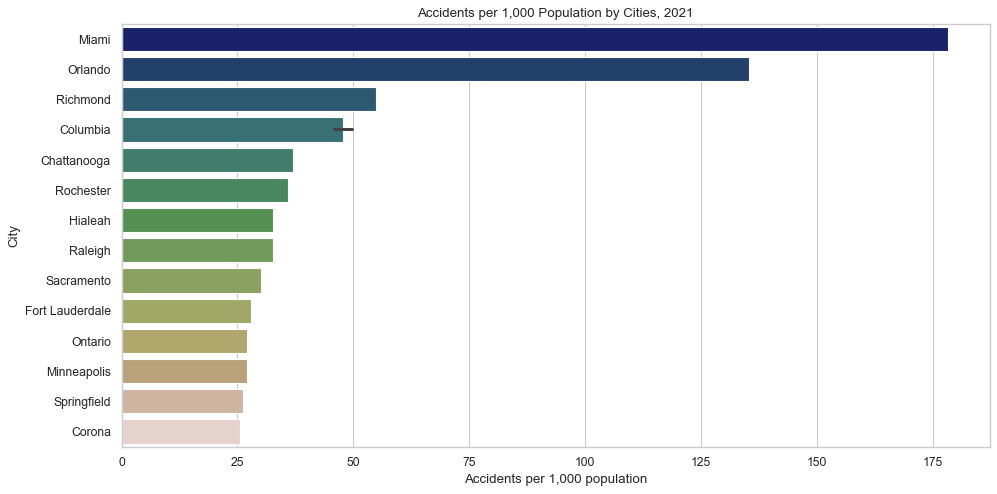

In [204]:
top_15_cities_by_accidents_per_1000_population = accidents_vs_city_population.head(15)

fig, ax = plt.subplots(figsize = (14,7), dpi = 80)

ax=sns.barplot(y='City', x='Accidents per 1,000 population', data = top_15_cities_by_accidents_per_1000_population, palette='gist_earth').set(title='Accidents per 1,000 Population by Cities, 2021')

What's that weird black lines in the Columbia bar?

To understand that let's look for the same data in table view

In [205]:
top_15_cities_by_accidents_per_1000_population

,City,State_x,Accidents_count,2021rank,State_y,2021estimate,2020census,Change,2020 land area,2020 land area.1,2020 population density,2020 population density.1,Location,"Accidents per 1,000 population"
0,Miami,FL,78875,44,Florida,439890,442241,−0.53%,36.0 sq mi,93.2 km2,"12,284/sq mi","4,743/km2",25°46′N 80°12′W﻿ / ﻿25.77°N 80.20°W,178.352979
3,Orlando,FL,41608,63,Florida,309154,307573,+0.51%,110.6 sq mi,286.5 km2,"2,781/sq mi","1,074/km2",28°25′N 81°16′W﻿ / ﻿28.41°N 81.27°W,135.278454
46,Richmond,VA,6381,252,California,115639,116448,−0.69%,30.1 sq mi,78.0 km2,"3,869/sq mi","1,494/km2",37°57′N 122°22′W﻿ / ﻿37.95°N 122.36°W,54.796991
54,Columbia,SC,6265,219,Missouri,126853,126254,+0.47%,66.5 sq mi,172.2 km2,"1,899/sq mi",733/km2,38°57′N 92°19′W﻿ / ﻿38.95°N 92.32°W,49.622190
53,Columbia,SC,6265,202,South Carolina,137541,136632,+0.67%,136.8 sq mi,354.3 km2,999/sq mi,386/km2,34°01′N 80°53′W﻿ / ﻿34.02°N 80.89°W,45.853094
45,Chattanooga,TN,6719,142,Tennessee,182113,181099,+0.56%,142.4 sq mi,368.8 km2,"1,272/sq mi",491/km2,35°04′N 85°14′W﻿ / ﻿35.06°N 85.24°W,37.101254
97,Rochester,NY,4362,237,Minnesota,121465,121395,+0.06%,55.5 sq mi,143.7 km2,"2,187/sq mi",844/km2,44°01′N 92°28′W﻿ / ﻿44.01°N 92.47°W,35.932287
36,Hialeah,FL,7307,102,Florida,220490,223109,−1.17%,21.6 sq mi,55.9 km2,"10,329/sq mi","3,988/km2",25°52′N 80°18′W﻿ / ﻿25.86°N 80.30°W,32.750808
20,Raleigh,NC,15285,41,North Carolina,469124,467665,+0.31%,145.1 sq mi,375.8 km2,"3,179/sq mi","1,227/km2",35°50′N 78°38′W﻿ / ﻿35.83°N 78.64°W,32.683652
16,Sacramento,CA,15848,35,California,525041,524943,+0.02%,98.6 sq mi,255.4 km2,"5,324/sq mi","2,056/km2",38°34′N 121°28′W﻿ / ﻿38.56°N 121.46°W,30.189944


Oops. It seems that there are two pair of big cities named Columbia and Springfield in different states. As a non-american person I haven't known that

So we have to create a column with the City-State data to make them unique

In [206]:
top_15_cities_by_accidents_per_1000_population['City-State'] = top_15_cities_by_accidents_per_1000_population['City'].iloc[:] + '-' + top_15_cities_by_accidents_per_1000_population['State_y'].iloc[:]

top_15_cities_by_accidents_per_1000_population.head(15)

,City,State_x,Accidents_count,2021rank,State_y,2021estimate,2020census,Change,2020 land area,2020 land area.1,2020 population density,2020 population density.1,Location,"Accidents per 1,000 population",City-State
0,Miami,FL,78875,44,Florida,439890,442241,−0.53%,36.0 sq mi,93.2 km2,"12,284/sq mi","4,743/km2",25°46′N 80°12′W﻿ / ﻿25.77°N 80.20°W,178.352979,Miami-Florida
3,Orlando,FL,41608,63,Florida,309154,307573,+0.51%,110.6 sq mi,286.5 km2,"2,781/sq mi","1,074/km2",28°25′N 81°16′W﻿ / ﻿28.41°N 81.27°W,135.278454,Orlando-Florida
46,Richmond,VA,6381,252,California,115639,116448,−0.69%,30.1 sq mi,78.0 km2,"3,869/sq mi","1,494/km2",37°57′N 122°22′W﻿ / ﻿37.95°N 122.36°W,54.796991,Richmond-California
54,Columbia,SC,6265,219,Missouri,126853,126254,+0.47%,66.5 sq mi,172.2 km2,"1,899/sq mi",733/km2,38°57′N 92°19′W﻿ / ﻿38.95°N 92.32°W,49.622190,Columbia-Missouri
53,Columbia,SC,6265,202,South Carolina,137541,136632,+0.67%,136.8 sq mi,354.3 km2,999/sq mi,386/km2,34°01′N 80°53′W﻿ / ﻿34.02°N 80.89°W,45.853094,Columbia-South Carolina
45,Chattanooga,TN,6719,142,Tennessee,182113,181099,+0.56%,142.4 sq mi,368.8 km2,"1,272/sq mi",491/km2,35°04′N 85°14′W﻿ / ﻿35.06°N 85.24°W,37.101254,Chattanooga-Tennessee
97,Rochester,NY,4362,237,Minnesota,121465,121395,+0.06%,55.5 sq mi,143.7 km2,"2,187/sq mi",844/km2,44°01′N 92°28′W﻿ / ﻿44.01°N 92.47°W,35.932287,Rochester-Minnesota
36,Hialeah,FL,7307,102,Florida,220490,223109,−1.17%,21.6 sq mi,55.9 km2,"10,329/sq mi","3,988/km2",25°52′N 80°18′W﻿ / ﻿25.86°N 80.30°W,32.750808,Hialeah-Florida
20,Raleigh,NC,15285,41,North Carolina,469124,467665,+0.31%,145.1 sq mi,375.8 km2,"3,179/sq mi","1,227/km2",35°50′N 78°38′W﻿ / ﻿35.83°N 78.64°W,32.683652,Raleigh-North Carolina
16,Sacramento,CA,15848,35,California,525041,524943,+0.02%,98.6 sq mi,255.4 km2,"5,324/sq mi","2,056/km2",38°34′N 121°28′W﻿ / ﻿38.56°N 121.46°W,30.189944,Sacramento-California


Let's find out if it helped

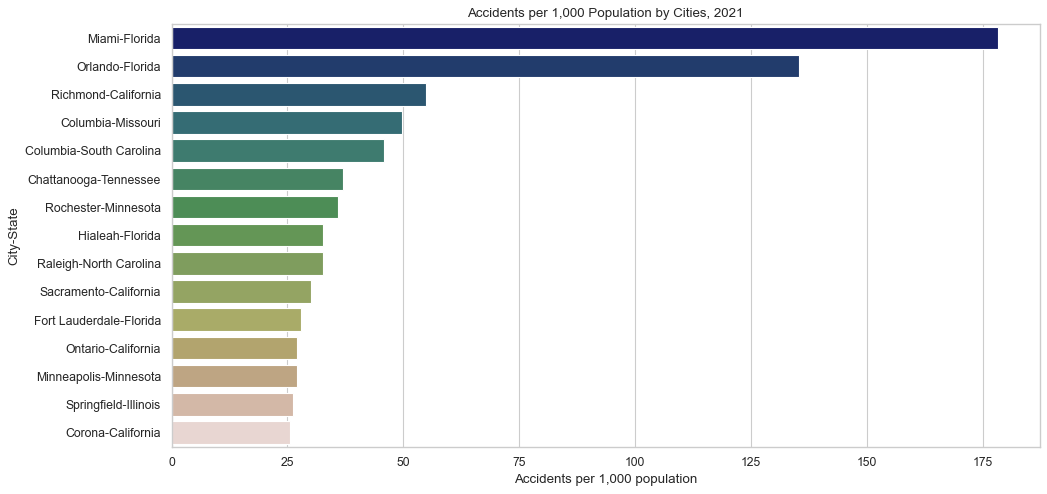

In [207]:
fig, ax = plt.subplots(figsize = (14,7), dpi = 80)

ax=sns.barplot(x='Accidents per 1,000 population', y='City-State', data = top_15_cities_by_accidents_per_1000_population, palette='gist_earth').set(title='Accidents per 1,000 Population by Cities, 2021')

⚡ Great! So now we can see, that charts by total number of accidents and number of accidents per 1,000 population are consist of different set of cities. For instance, Los Angeles and Dallas are in top-5 by number of accidents, but they don't even appear in top-15 cities by number of accidents per capita

⚡ Another insight is that 7 out of 15 cities with the highest accident rates are located in California and Florida. Genuinely, I can't believe, that people drive in a crazy manner there or that transportation and road systems are in the worst conditions in that states. My hypothesis is that these states provided more data to the consolidated dataframe or they have the most complete of accidents data collection systems.

So let's combine these two metrics on one chart

In [208]:
top_15_cities_by_accidents_per_1000_population_accs_desc = top_15_cities_by_accidents_per_1000_population.sort_values(['Accidents_count'],ascending=[False]).head(15)

Text(0, 0.5, 'Accidents per 1,000 Population')

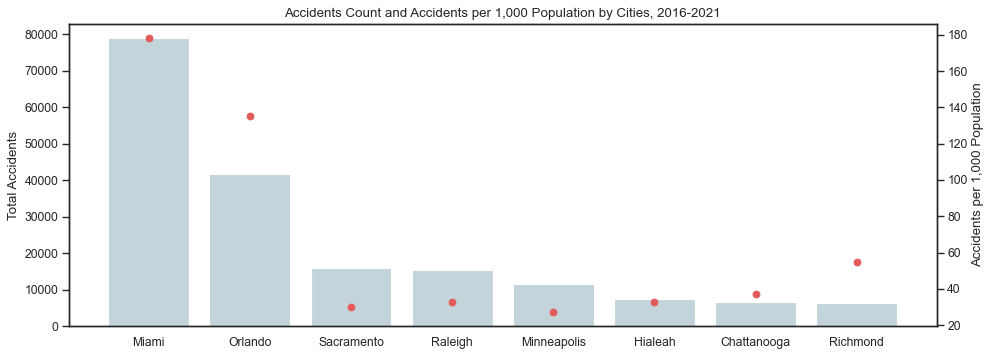

In [209]:
top_8_cities_by_accidents_per_1000_population_accs_desc = top_15_cities_by_accidents_per_1000_population.sort_values(['Accidents_count'],ascending=[False]).head(8)

sns.set_theme(style="white")

fig, ax1 = plt.subplots(figsize = (14,5), dpi = 80)

ax2 = ax1.twinx()

ax1.bar(top_8_cities_by_accidents_per_1000_population_accs_desc['City'], top_8_cities_by_accidents_per_1000_population_accs_desc['Accidents_count'],color='#c3d5da')
ax1.set_title("Accidents Count and Accidents per 1,000 Population by Cities, 2016-2021")
ax1.set_ylabel("Total Accidents")

ax2.plot(top_8_cities_by_accidents_per_1000_population_accs_desc['City'], top_8_cities_by_accidents_per_1000_population_accs_desc['Accidents per 1,000 population'],'o',color='#e45b5c')
ax2.set_ylabel("Accidents per 1,000 Population")

⚡ And here we can see that Miami and Orlando are leaders in both total accidents and accidents per capita. But we can't say for other cities. So, Los Angelenos, if by this point you have started to think to change your mayor, please don't! You have a huge number because of the city is giantic, but the number of accidents per 1,000 of population is relatively small.

### States

Let's look for the data by states

In [210]:
df_states = df_accidents['State'].value_counts().to_frame().reset_index().set_axis(['State', 'Accidents_count'], axis=1)

df_states.head(3)

,State,Accidents_count
0,CA,795868
1,FL,401388
2,TX,149037


In [211]:
data = dict(
        type = 'choropleth',
        locations = df_states['State'],
        locationmode = 'USA-states',
        z = df_states['Accidents_count'],
        text = [],
        colorscale = 'brwnyl',
        colorbar = {'title' : 'Accidents Count'},
      )

layout = dict(title = 'Accidents Count by States, 2016-2021',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout,skip_invalid=True)
iplot(choromap,validate=False)

We will make pretty the same as for cities: compare total number of accidents with number of accidents per 1,000 population

In [212]:
wiki_states_population = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population")
df_states_population = wiki_states_population[0]
df_states_population=df_states_population.droplevel(0, axis=1).rename(columns={'State or territory': 'State'})


us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

df_states_population['State'] = df_states_population['State'].map(us_state_abbrev).fillna(df_states_population['State'])

df_states_population.head(3)

,2020,2010,State,"July 1, 2021 (est.)","April 1, 2020","April 1, 2010",%,Abs.,Seats,%,"Pop. per elec. vote, 2020[b] from the 2022 elections",From 2022,2010,2020,2010,% of Elec. Coll.,Unnamed: 16_level_1
0,1.0,1.0,CA,39237836.0,39538223,37253956,6.13%,2284267,52,11.95%,732189,760350,702905,11.800%,11.908%,10.04%,NaN
1,2.0,2.0,TX,29527941.0,29145505,25145561,15.91%,3999944,38,8.74%,728638,766987,698488,8.698%,8.038%,7.43%,NaN
2,3.0,4.0,FL,21781128.0,21538187,18801310,14.56%,2736877,28,6.44%,717940,769221,696345,6.428%,6.010%,5.58%,NaN


In [213]:
df_states_2021 = accidents_2021['State'].value_counts().to_frame().reset_index().set_axis(['State', 'Accidents_count_2021'], axis=1)
df_states_2021.head(3)

accidents_vs_state_population = pd.merge(df_states_2021,df_states_population,how='inner',on='State')
accidents_vs_state_population['Accidents per 1,000 population'] = accidents_vs_state_population['Accidents_count_2021'] / accidents_vs_state_population['July 1, 2021 (est.)'] * 1000
accidents_vs_state_population = accidents_vs_state_population.sort_values(['Accidents per 1,000 population'],ascending=[False])
accidents_vs_state_population.head(3)

,State,Accidents_count_2021,2020,2010,"July 1, 2021 (est.)","April 1, 2020","April 1, 2010",%,Abs.,Seats,%,"Pop. per elec. vote, 2020[b] from the 2022 elections",From 2022,2010,2020,2010,% of Elec. Coll.,Unnamed: 16_level_1,"Accidents per 1,000 population"
4,SC,66813,23.0,24.0,5190705.0,5118425,4625364,10.66%,493061,7,1.61%,568714,731204,660766,1.528%,1.478%,1.67%,NaN,12.871662
1,FL,278395,3.0,4.0,21781128.0,21538187,18801310,14.56%,2736877,28,6.44%,717940,769221,696345,6.428%,6.010%,5.58%,NaN,12.781478
19,MT,13327,45.0,45.0,1104271.0,1084225,989415,9.58%,94810,2,0.46%,271056,542113,989415,0.324%,0.316%,0.74%,NaN,12.068595


In [214]:
data = dict(
        type = 'choropleth',
        locations = accidents_vs_state_population['State'],
        locationmode = 'USA-states',
        z = accidents_vs_state_population['Accidents per 1,000 population'],
        text = [],
        colorscale = 'brwnyl',
        colorbar = {'title' : 'Accidents per 1,000 population'},
      )

layout = dict(title = 'Accidents Per 1,000 Population By States, 2021',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout,skip_invalid=True)
iplot(choromap,validate=False)

⚡ Two USA maps look differently, for instance, Florida and California are leaders in both categories, but on the second map, which shows accidents per capita, we can see states with high rates: Oregon, Minnesota, Montana, South Carolina. We haven't seen them on the first map

Ok, let's combine the data in the one chart

Text(0, 0.5, 'Accidents per 1,000 Population')

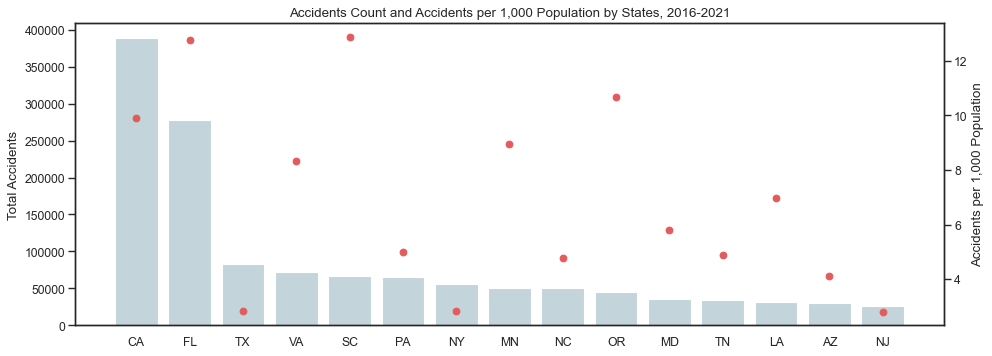

In [215]:
top_15_states = accidents_vs_state_population.sort_values(['Accidents_count_2021'],ascending=[False]).head(15)

sns.set_theme(style="white")

fig, ax1 = plt.subplots(figsize = (14,5), dpi = 80)

ax2 = ax1.twinx()

ax1.bar(top_15_states['State'], top_15_states['Accidents_count_2021'],color='#c3d5da')
ax1.set_title("Accidents Count and Accidents per 1,000 Population by States, 2016-2021")
ax1.set_ylabel("Total Accidents")

ax2.plot(top_15_states['State'], top_15_states['Accidents per 1,000 population'],'o',color='#e45b5c')
ax2.set_ylabel("Accidents per 1,000 Population")

⚡ Texas is number 3 in top-states by accidents, but it has big population and thus low rate of accidents per capita 👏

# Time Analysis

We want to see how number of accidents changed in the last 5 years

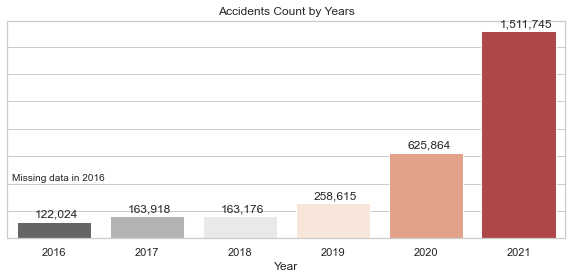

In [216]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (10,4))

ax = sns.countplot(x="Year", data=df_accidents, palette = "RdGy_r")

plt.annotate('Missing data in 2016',xy=(-0.45,420000), fontsize=10)

ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set_title("Accidents Count by Years")

for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+30000
    ax.annotate(count, (x, y))
    
plt.show()

⚡ Again. I can't accept that number of accidents increased dramatically. I think that it is related with an intensity and methods of data collection

Let's look how accidetns distributed by months

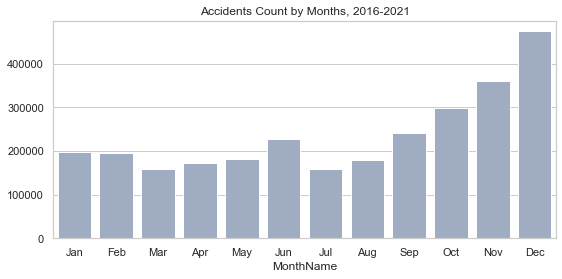

In [217]:
fig, ax = plt.subplots(figsize = (9,4))

ax = sns.countplot(x="MonthName", data=df_accidents, color = "#9aaac7",order=Months)

ax.set(ylabel=None)
ax.set_title("Accidents Count by Months, 2016-2021")

plt.show()

⚡ Most of the accidents occured in winter and late-autumn months because of the road conditions during rainy and snowy time

Let's see if it's correct for the last 3 years separately

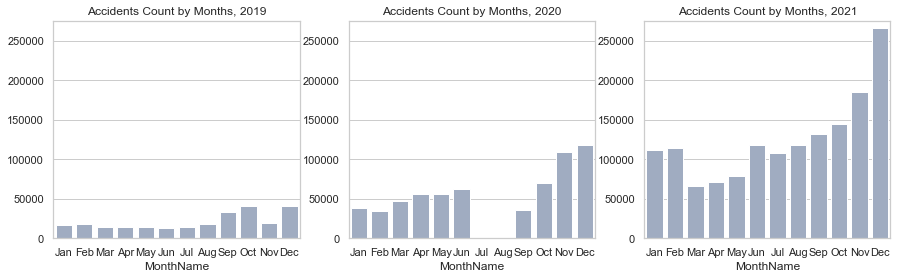

In [218]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

sns.countplot(x="MonthName", data=accidents_2019, color = "#9aaac7",order=Months, ax=ax1)
ax1.set(ylabel=None, ylim=(0, 275000))
ax1.set_title("Accidents Count by Months, 2019")

sns.countplot(x="MonthName", data=accidents_2020, color = "#9aaac7",order=Months, ax=ax2)
ax2.set(ylabel=None, ylim=(0, 275000))
ax2.set_title("Accidents Count by Months, 2020")

sns.countplot(x="MonthName", data=accidents_2021, color = "#9aaac7",order=Months, ax=ax3)
ax3.set(ylabel=None, ylim=(0, 275000))
ax3.set_title("Accidents Count by Months, 2021")

plt.show()

It's seems that the pattern is pretty much the same for different years

Let's look how accidetns distributed by day of the week

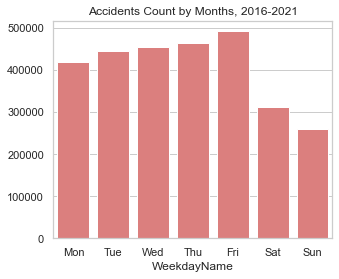

In [219]:
fig, ax = plt.subplots(figsize = (5,4))

ax = sns.countplot(x="WeekdayName", data=df_accidents, color = "#eb706e",order=Days)

ax.set(ylabel=None)
ax.set_title("Accidents Count by Months, 2016-2021")
    
plt.show()

We want to check if the distribution is the same for the last 3 years separately

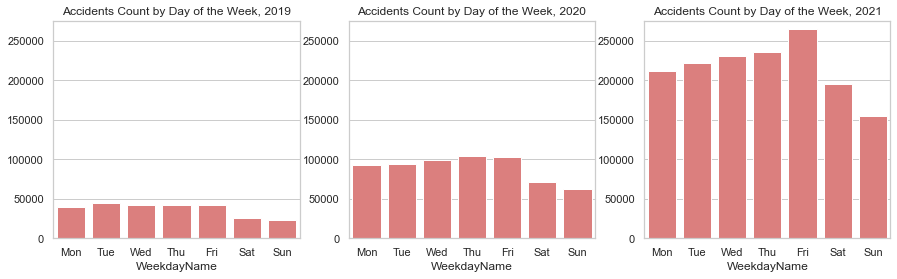

In [220]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

sns.countplot(x="WeekdayName", data=accidents_2019, color = "#eb706e",order=Days, ax=ax1)
ax1.set(ylabel=None, ylim=(0, 275000))
ax1.set_title("Accidents Count by Day of the Week, 2019")

sns.countplot(x="WeekdayName", data=accidents_2020, color = "#eb706e",order=Days, ax=ax2)
ax2.set(ylabel=None, ylim=(0, 275000))
ax2.set_title("Accidents Count by Day of the Week, 2020")

sns.countplot(x="WeekdayName", data=accidents_2021, color = "#eb706e",order=Days, ax=ax3)
ax3.set(ylabel=None, ylim=(0, 275000))
ax3.set_title("Accidents Count by Day of the Week, 2021")

plt.show()

⚡ Hm. Ok, Saturday and Sunday has expectedly low numbers of accidents. Also, in 2020-2021 the number of accidents grows by the end of the week. But in 2021 number of accidents on Friday is abnormally high. Let's take a look if we had the same pattern in 2016-2018

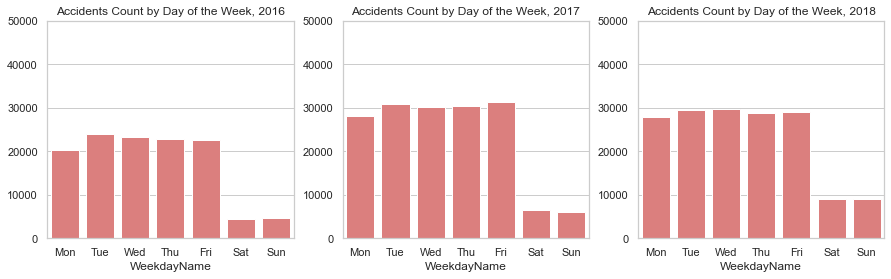

In [221]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

sns.countplot(x="WeekdayName", data=accidents_2016, color = "#eb706e",order=Days, ax=ax1)
ax1.set(ylabel=None, ylim=(0, 50000))
ax1.set_title("Accidents Count by Day of the Week, 2016")

sns.countplot(x="WeekdayName", data=accidents_2017, color = "#eb706e",order=Days, ax=ax2)
ax2.set(ylabel=None, ylim=(0, 50000))
ax2.set_title("Accidents Count by Day of the Week, 2017")

sns.countplot(x="WeekdayName", data=accidents_2018, color = "#eb706e",order=Days, ax=ax3)
ax3.set(ylabel=None, ylim=(0, 50000))
ax3.set_title("Accidents Count by Day of the Week, 2018")

plt.show()

It doesn't seem like that, so we can be sure only about Saturday and Sunday

We could also show all month on one heatmap

<AxesSubplot:xlabel='Year', ylabel='Month'>

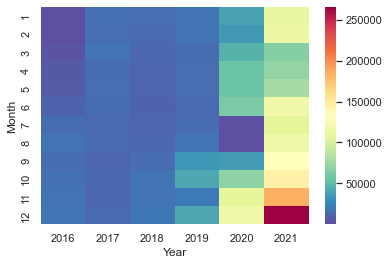

In [222]:
df_accidents_year_month = df_accidents.pivot_table(values='ID',index='Month',columns='Year',aggfunc='count')
df_accidents_year_month
sns.heatmap(df_accidents_year_month,cmap='Spectral_r')

Now we want to look the distribution by hours of the day

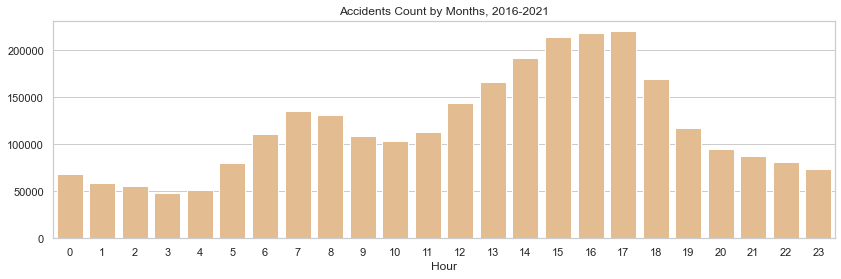

In [223]:
fig, ax = plt.subplots(figsize = (14,4))

ax = sns.countplot(x="Hour", data=df_accidents, color = "#f1bc83")

ax.set(ylabel=None)
ax.set_title("Accidents Count by Months, 2016-2021")

plt.show()

It was expected that we have two peaks during morning and evening traffic jams. But the evening peak is significantly higher. Is it because everyone is tired after working hours ❓

## Conclusions on Geographical and Time Analysis

When you will read the conclusion below, keep in mind the phrase 'According to the data'. Because as I mentioned above, my hypothesis is that there is more data:

* coming from Florida and California states
* coming from 2021 year

We have to communicate with the provider of the data to confirm that facts.

1. Miami, Los Angeles and Orlando are 3 cities with the highest number of Total Accidents in 2021.
2. By the accidents per 1,000 population Miami and Orlando are still in a top-3. But some cities are out of the top-15, such as Los Angeles and Dallas.
3. California, Florida and Texas are 3 states with the highest number of Total Accidents in 2021.
4. By the accidents per 1,000 population South Carolina, Florida and Montana are 3 states with number of accidents more than 12.
5. The most dangerous period for drivers is from October to March, especially in a winter months.
6. There is not enough evidence to argue that Friday is the most dangerous day of the week, because it has significantly high numbers only in 2021. But because of 2021 data is the most extensive, it affected to the all 6 years of dataset.
7. There are two peaks during the day in the morning end evening. But in the evening there are more accidents, presumably because drivers are more tired after working hours and as a result less focused.